# <span style="color:#65939B"> Google Data Analytics Capstone Project: Case Study 1 </span>

## <span style="color:#65939B"> Cyclistic Bike-Share </span>

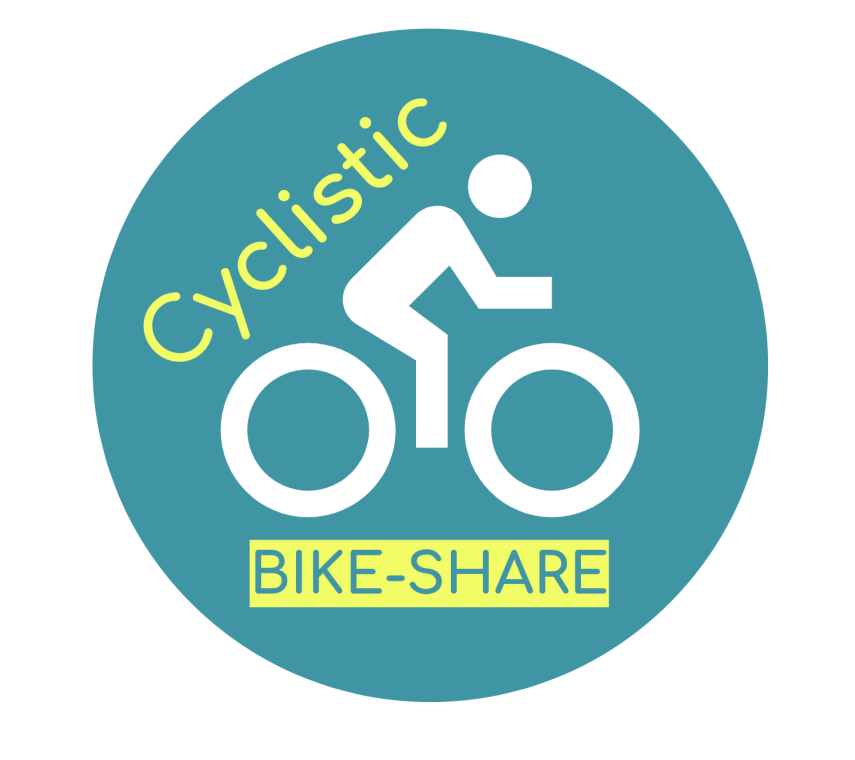

# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Project Overview</p>

Welcome to the Cyclistic bike-share analysis case study! In this case study, Let's perform many real-world tasks of data analysis. Let's assume work for Cyclistic, a fictional company with different characters and team members. In order to answer the key business questions, I am gonna follow the steps of the data analysis process: <b>ask, prepare, process, analyze,share, and act</b>.

# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About the Company</p>

Cyclistic, A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day


# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Ask Phase</p>

## Business Task

Analyze the Cyclistic bike users data to identify difference between annual riders and casual riders, and recommend marketing stratagies aimed at converting casual riders into annual members.
1. **Casual Riders**
    * single-ride pass
    * full-day pass
2. **Annual Members**

## Stakeholders

   * **Lily Moreno**: The director of marketing and manager.
   * **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and
      reporting data that helps guide Cyclistic marketing strategy
   * **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the
      recommended marketing program.
      
## Questions for Analysis

   1. How do annual members and casual riders use Cyclistic bikes differently?
   2. Why would casual riders buy Cyclistic annual memberships?
   3. How can Cyclistic use digital media to influence casual riders to become members?

# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Prepare Phase</p>

## Dataset Info
The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study,
the datasets are appropriate and has been made available by __[Motivate International Inc.](https://divvy-tripdata.s3.amazonaws.com/index.html)__ under the inspiration from __[Divvy bikes](https://ride.divvybikes.com/)__.

## Licensing, Accessibility, Privacy and Security
Verifying from the Dataset, this is public data that can use to explore how different customer types are
using Cyclistic bikes. But note that data-privacy issues are prohibited from using riders’ personally identifiable information.This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.For detailed informtion, Look into the __[Data License Agreement](https://ride.divvybikes.com/data-license-agreement)__.

## Data Integrity and Credibility
The dataset is collected from past 12 months of 2022 which means obvious that the dataset is not current. Another thing we encounter is the dataset from the Cyclistic,a fictional company, collected from Divvy bikes and made available by Motivate International Inc. which means third-party Data.

## Data Organization
Available to us are 12 CSV files separated by the Delimitter ",". Each of the CSV files represents the one month of all the 12 months of trip data consists of both Quantitative and Qualitative Data. The data is considered as Long data since each subject have data in multiple rows.


# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Processing Phase</p>

**Tool**: In this Project, I am goint to use **SQL and R** programming language due to large size of the data and for statistical analysis, Data manipualtion and Data visualization

## Importing necessary packages

In [74]:
options = (warn = -1)
options(repr.matrix.max.cols=Inf)
library(tidyverse)
library(skimr)
library(janitor)
library(mice)
library(ggmice)
library(data.table)
library(geosphere)
library(sqldf)
library(hms)

## Importing Datasets
* We are gonna upload the 12 months of trip data (2022), each month residing in separate csv files

In [75]:
jan_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/1_January/202201-divvy-tripdata.csv")
feb_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/2_February/202202-divvy-tripdata.csv")
mar_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/3_March/202203-divvy-tripdata.csv")
apr_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/4_April/202204-divvy-tripdata.csv")
may_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/5_May/202205-divvy-tripdata.csv")
jun_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/6_June/202206-divvy-tripdata.csv")
jul_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/7_July/202207-divvy-tripdata.csv")
aug_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/8_August/202208-divvy-tripdata.csv")
sep_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/9_September/202209-divvy-publictripdata.csv")
oct_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/10_October/202210-divvy-tripdata.csv")
nov_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/11_November/202211-divvy-tripdata.csv")
dec_2022 <- read_csv("/kaggle/input/cyclistic-bike-share-data/Cyclist trip data/12_December/202112-divvy-tripdata.csv")

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

## Columns and Shape of the datasets

In [76]:
my_list_df <- list(jan_2022, feb_2022, mar_2022, apr_2022, may_2022, jun_2022,
                   jul_2022, aug_2022, sep_2022, oct_2022, nov_2022, dec_2022)

for (month in my_list_df) {
  cat(paste(list(dim(month)), list(colnames(month)), sep = " --> "), "\n\n")
}


c(103770, 13) --> c("ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual") 

c(115609, 13) --> c("ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual") 

c(284042, 13) --> c("ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual") 

c(371249, 13) --> c("ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual") 

c(634858, 13) --> c("ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", 

## Data types

In [77]:
t(sapply(jan_2022, class))
t(sapply(feb_2022, class))
t(sapply(mar_2022, class))
t(sapply(apr_2022, class))
t(sapply(may_2022, class))
t(sapply(jun_2022, class))
t(sapply(jul_2022, class))
t(sapply(aug_2022, class))
t(sapply(sep_2022, class))
t(sapply(oct_2022, class))
t(sapply(nov_2022, class))
t(sapply(dec_2022, class))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
character,character,"POSIXct, POSIXt","POSIXct, POSIXt",character,character,character,character,numeric,numeric,numeric,numeric,character


In [78]:
# head(jan_2022)
# head(feb_2022)
# head(mar_2022)
# head(apr_2022)
# head(may_2022)
# head(jun_2022)
# head(jul_2022)
# head(aug_2022)
# head(sep_2022)
# head(oct_2022)
# head(nov_2022)
# head(dec_2022)

* On Examinig the datasets, all are having same columns and same data types.
* Lets merge the datasets vertically into a single large dataset

## Merging the datasets

In [79]:
all_trip_data_2022 <- rbind(jan_2022, feb_2022, mar_2022, apr_2022, may_2022, jun_2022,
                            jul_2022, aug_2022, sep_2022, oct_2022, nov_2022, dec_2022)

## Previewing Our Dataset

In [80]:
head(all_trip_data_2022)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


In [81]:
skim(all_trip_data_2022)

,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,POSIXct,started_at,0,1.0000000,2021-12-01 00:00:01,2022-11-30 23:56:11,2022-07-13 22:04:44,4804383,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,POSIXct,ended_at,0,1.0000000,2021-12-01 00:02:40,2022-12-01 11:45:53,2022-07-13 22:22:06,4816773,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,ride_id,0,1.0000000,NA,NA,NA,NA,16,16,0,5733451,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,rideable_type,0,1.0000000,NA,NA,NA,NA,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,854844,0.8509024,NA,NA,NA,NA,7,64,0,1663,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,854844,0.8509024,NA,NA,NA,NA,3,44,0,1311,0,NA,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,915082,0.8403960,NA,NA,NA,NA,9,64,0,1682,0,NA,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,915082,0.8403960,NA,NA,NA,NA,3,44,0,1316,0,NA,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,NA,NA,NA,NA,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values            
Name                       all_trip_data_2022
Number of rows             5733451           
Number of columns          13                
_______________________                      
Column type frequency:                       
  character                7                 
  numeric                  4                 
  POSIXct                  2                 
________________________                     
Group variables            None              

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5733451          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    854844         0.851   7  64     0     1663          0
4 start_station_id      854844         0.851   3  44   

In [82]:
summary(all_trip_data_2022)

   ride_id          rideable_type        started_at                 
 Length:5733451     Length:5733451     Min.   :2021-12-01 00:00:01  
 Class :character   Class :character   1st Qu.:2022-05-17 12:04:44  
 Mode  :character   Mode  :character   Median :2022-07-13 22:04:44  
                                       Mean   :2022-07-06 05:55:33  
                                       3rd Qu.:2022-09-07 17:55:40  
                                       Max.   :2022-11-30 23:56:11  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-12-01 00:02:40   Length:5733451     Length:5733451    
 1st Qu.:2022-05-17 12:27:04   Class :character   Class :character  
 Median :2022-07-13 22:22:06   Mode  :character   Mode  :character  
 Mean   :2022-07-06 06:14:59                                        
 3rd Qu.:2022-09-07 18:11:41                                        
 Max.   :2022-12-01 11:45:53      

## Data Cleaning

### Missing Values

From the above summaries, we can see some missing values in some of the fields. Let's handle those missing values.

In [83]:
# Locating the missing values in each fields
locate_na <- all_trip_data_2022
any_na <- apply(locate_na, 1, function(x) any(is.na(x)))
locate_na[any_na, ]

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NA,NA,Lockwood Ave & Wrightwood Ave,312,41.93000,-87.76000,41.93000,-87.76000,casual
88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NA,NA,41.89763,-87.64339,41.90000,-87.64000,member
1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NA,NA,41.89000,-87.72000,41.90000,-87.71000,member
565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NA,NA,Ashland Ave & Grace St,13319,41.95000,-87.65000,41.95069,-87.66870,member
C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NA,NA,Ashland Ave & Grace St,13319,41.92000,-87.69000,41.95069,-87.66870,member
A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NA,NA,Southport Ave & Clybourn Ave,TA1309000030,41.91000,-87.69000,41.92077,-87.66371,member
A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NA,NA,Southport Ave & Clybourn Ave,TA1309000030,41.91000,-87.69000,41.92077,-87.66371,member
80F29B80E0DF905A,electric_bike,2022-01-03 16:07:17,2022-01-03 16:17:10,NA,NA,Wallace St & 35th St,TA1308000045,41.83000,-87.62000,41.83101,-87.64118,member
5D1029D15EA45DA1,electric_bike,2022-01-08 13:20:27,2022-01-08 13:29:31,NA,NA,Woodlawn Ave & Lake Park Ave,KA1503000065,41.80000,-87.59000,41.81409,-87.59701,member


In [84]:
# Calculating the missing values in each fields
colSums(is.na(all_trip_data_2022))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            854844             854844             915082             915082 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5874               5874 
     member_casual 
                 0

In [85]:
# Calculating the percentage of missing values in each column
missing_percentage <- colMeans(is.na(all_trip_data_2022)) * 100

# Round the values to two decimal places
rounded_percentage <- round(missing_percentage, digits = 2)

# Print the rounded missing percentage for each column
print(rounded_percentage)


           ride_id      rideable_type         started_at           ended_at 
              0.00               0.00               0.00               0.00 
start_station_name   start_station_id   end_station_name     end_station_id 
             14.91              14.91              15.96              15.96 
         start_lat          start_lng            end_lat            end_lng 
              0.00               0.00               0.10               0.10 
     member_casual 
              0.00 


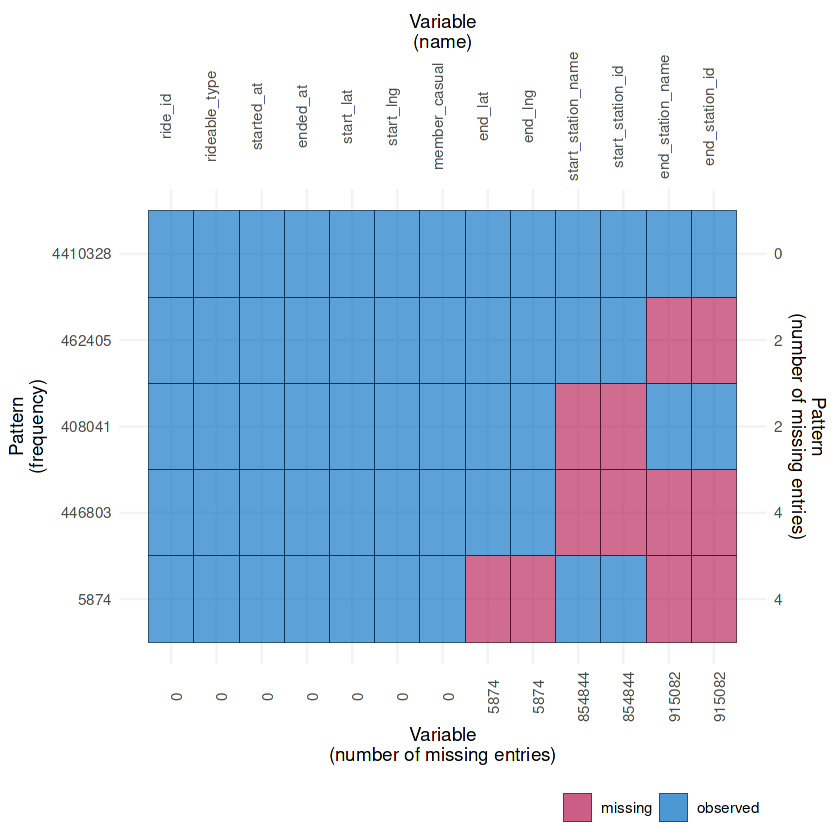

In [86]:
# Identifying the patterns of missing values in each fields
plot_pattern(all_trip_data_2022, rotate=TRUE)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,end_lat,end_lng,start_station_name,start_station_id,end_station_name,end_station_id,
4410328,1,1,1,1,1,1,1,1,1,1,1,1,1,0
462405,1,1,1,1,1,1,1,1,1,1,1,0,0,2
408041,1,1,1,1,1,1,1,1,1,0,0,1,1,2
446803,1,1,1,1,1,1,1,1,1,0,0,0,0,4
5874,1,1,1,1,1,1,1,0,0,1,1,0,0,4
,0,0,0,0,0,0,0,5874,5874,854844,854844,915082,915082,3551600


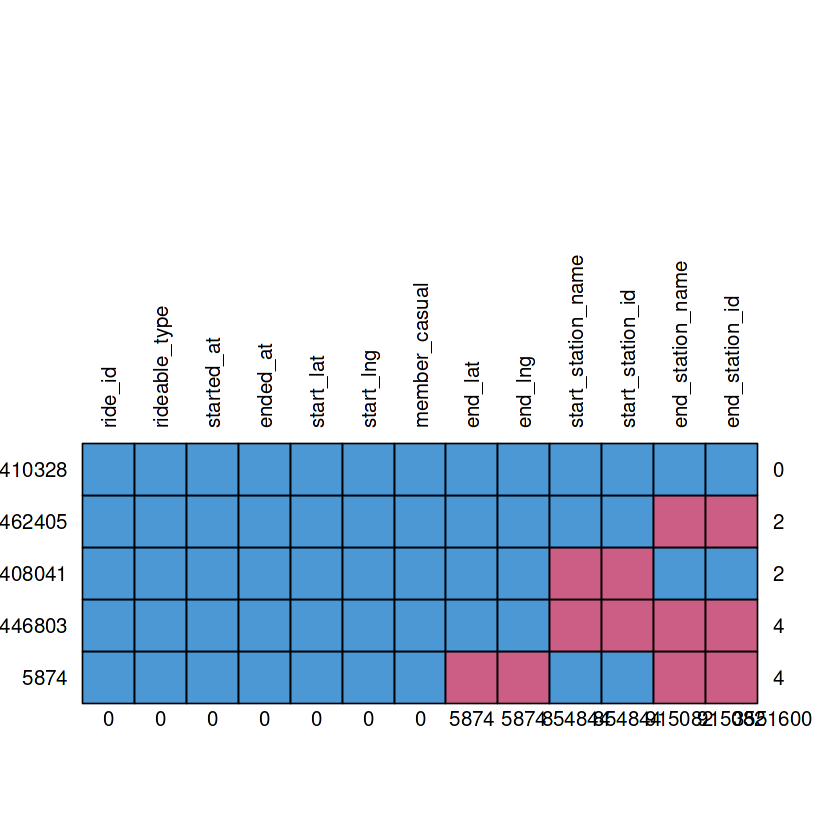

In [87]:
md.pattern(all_trip_data_2022, plot=TRUE, rotate.names=TRUE)

* From the above observations, the missing values corresponds to be less than 20 % for each missing value column. By removing the  missing values won't affect he sample size for Analysis
* So, Lets's omit all missing values

In [88]:
clean_data <- na.omit(all_trip_data_2022)
head(clean_data,10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member


In [89]:
dim(clean_data)

[1] 4410328      13

### Duplicates
Now Let's focus on checking duplicates if it exists

In [90]:
get_dupes(clean_data)

No variable names specified - using all columns.


No duplicate combinations found of: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, ... and 4 other variables



ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dupe_count
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [91]:
get_dupes(clean_data,ride_id)

No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


So, there are no duplicates either from all the columns as well as the ride_id column (primary key)

### Naming Conventions
Let's ensure that all the column names from dataset have appropirate naming coventions.

In [92]:
# Rename the "col2" column to "new_col"
clean_data <- rename(clean_data,user_type = member_casual)

In [93]:
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


Now that our dataset is clean and ready for Analysis phase

## Augmenting new fields
Let's add some fields to the dataset and enhance with new information for better interpretation and analysis

### ride_length column

In [94]:
# clean_data %>%
#     mutate(ride_length = as.duration(ended_at - started_at))

In [95]:
clean_data <- clean_data %>%
                  mutate(ride_length = hms::as_hms(ended_at - started_at))
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22


* Well some of the observations in ride_length column have zero and negative values.
* Let's check the number of instances and remove those rows.

In [96]:
sum(clean_data$ride_length <= 0)

[1] 300

In [97]:
clean_data <- clean_data[!clean_data$ride_length <= 0,]

In [98]:
sum(clean_data$ride_length <= 0)

[1] 0

### day_of_week column
For interpreting weekly changes

In [99]:
clean_data <- clean_data %>%
  mutate(day_of_week = weekdays(started_at))
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thursday
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Monday
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,Tuesday
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,Tuesday


### month column
For interpreting monthly changes

In [100]:
clean_data <- clean_data %>%
              mutate(month = month(started_at),
                     month = month.name[month])
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thursday,January
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Monday,January
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,Tuesday,January
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,Tuesday,January
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,Thursday,January
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,Tuesday,January


### started_hour column

In [101]:
clean_data <- clean_data %>%
                mutate(started_hour = hour(started_at),
                       started_hour = factor(started_hour, levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)))
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thursday,January,11
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Monday,January,8
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,Tuesday,January,4
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,Tuesday,January,0
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,Thursday,January,1
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,Tuesday,January,18


In [102]:
# splitting datetime columns
# clean_data <-clean_data %>%
#               mutate(started_date = as.Date(started_at),
#                      started_time = format(started_at, "%H:%M:%S"),
#                      ended_date = as.Date(ended_at),
#                      ended_time = format(ended_at, "%H:%M:%S"))

### distance column

In [103]:
clean_data <- clean_data %>%
                  mutate(distance_km = round(distVincentySphere(cbind(start_lng, start_lat), cbind(end_lng, end_lat))/1000, digits=2))

In [104]:
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,00:02:57,Thursday,January,11,0.70
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,00:04:21,Monday,January,8,0.70
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,00:04:21,Tuesday,January,4,1.00
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,00:14:56,Tuesday,January,0,2.47
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,00:06:02,Thursday,January,1,0.82
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,00:03:22,Tuesday,January,18,0.85


In [105]:
clean_data %>% 
    arrange(started_at, ended_at) %>%
    slice(1:10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>
0CD83C3FE35E69A0,classic_bike,2021-12-01 00:00:03,2021-12-01 00:07:34,State St & Kinzie St,13050,St. Clair St & Erie St,13016,41.88919,-87.62775,41.89435,-87.62280,casual,00:07:31,Wednesday,December,0,0.71
5CB387082B4310B2,classic_bike,2021-12-01 00:03:44,2021-12-01 00:07:44,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.78510,-87.60107,41.79148,-87.59986,member,00:04:00,Wednesday,December,0,0.72
A8830C276991FBBC,classic_bike,2021-12-01 00:04:31,2021-12-01 00:07:37,Lake Park Ave & 47th St,TA1308000035,Greenwood Ave & 47th St,TA1308000002,41.80944,-87.59188,41.80983,-87.59938,member,00:03:06,Wednesday,December,0,0.62
5888E624121F3AF1,electric_bike,2021-12-01 00:05:32,2021-12-01 00:19:18,Clark St & Chicago Ave,13303,Ping Tom Park (East),20260.0,41.89677,-87.63106,41.86000,-87.63000,member,00:13:46,Wednesday,December,0,4.09
82CE2ACCE16EE094,classic_bike,2021-12-01 00:05:47,2021-12-01 00:32:52,Michigan Ave & Lake St,TA1305000011,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.88602,-87.62412,41.93259,-87.63643,member,00:27:05,Wednesday,December,0,5.28
D83AD6373B1F83F8,classic_bike,2021-12-01 00:06:35,2021-12-01 00:18:47,Ogden Ave & Chicago Ave,TA1305000020,Canal St & Adams St,13011,41.89636,-87.65406,41.87926,-87.63990,member,00:12:12,Wednesday,December,0,2.24
A31FD6711E68A01B,classic_bike,2021-12-01 00:06:52,2021-12-01 00:11:38,Ellis Ave & 60th St,KA1503000014,Ellis Ave & 55th St,KA1504000076,41.78510,-87.60107,41.79430,-87.60145,member,00:04:46,Wednesday,December,0,1.03
06A16235908F1DB2,classic_bike,2021-12-01 00:06:52,2021-12-01 00:11:39,Ellis Ave & 60th St,KA1503000014,Ellis Ave & 55th St,KA1504000076,41.78510,-87.60107,41.79430,-87.60145,member,00:04:47,Wednesday,December,0,1.03
04C29F246901A7BC,classic_bike,2021-12-01 00:07:45,2021-12-01 00:26:46,Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,41.78510,-87.60107,41.79148,-87.59986,member,00:19:01,Wednesday,December,0,0.72


In [106]:
clean_data %>%
  mutate(year = format(started_at, "%Y")) %>%
  count(year)


year,n
<chr>,<int>
2021,176369
2022,4233659


In [107]:
 clean_data %>%
  mutate(year_started_at = format(started_at, "%Y"),
         year_ended_at = format(ended_at, "%Y")) %>%
   filter(year_started_at == "2021" | year_ended_at == "2022") %>%
  count(year_started_at, year_ended_at)

year_started_at,year_ended_at,n
<chr>,<chr>,<int>
2021,2021,176315
2021,2022,54
2022,2022,4233659


* Since some of the date includes the year 2021.
* Let's remove those dates which contains 2021 in both started_at and ended_at variables

In [108]:
clean_data <- clean_data %>%
                  mutate(year_started_at = format(started_at, "%Y"),
                         year_ended_at = format(ended_at, "%Y")) %>%
                  filter(!(year_started_at == "2021" & year_ended_at == "2021"))

In [109]:
# Let's make sure if there any 2021 year in both started_at and ended_at column
clean_data %>%
  mutate(year_started_at = format(started_at, "%Y"),
         year_ended_at = format(ended_at, "%Y")) %>%
   filter(year_started_at == "2021" & year_ended_at == "2021") %>%
  count(year_started_at, year_ended_at)

year_started_at,year_ended_at,n
<chr>,<chr>,<int>


In [110]:
# filtered_data <- clean_data %>%
#   filter(year(started_at) = 2021,year(ended_at) == 2021)

# num_rows <- nrow(filtered_data)

# print(num_rows)

# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Analysis & Share Phase</p>

## Maximum ride duration

In [111]:
clean_data %>%
    summarise(max_ride_length = max(as.duration(ride_length)))
#     mutate(max_ride_length = as.numeric(max_ride_length),
#            max_ride_length = hms::hms(max_ride_length))      

max_ride_length
<dbl>
2061244


In [112]:
# Assuming clean_data$ride_length contains numeric values representing ride lengths in seconds
max_ride_length <- max(clean_data$ride_length)

# Convert the maximum ride length to "hms" format
max_ride_length_hms <- seconds_to_period(max_ride_length)

# Print the maximum ride length in "hms" format
print(max_ride_length_hms)

[1] "23d 20H 34M 4S"


* On Finding out the maximum duration, it's quite unusual.


## Outlier

In [113]:
clean_data %>%
  arrange(desc(ride_length)) %>%
  slice(1:10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km,year_started_at,year_ended_at
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>
23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,Sheffield Ave & Fullerton Ave,TA1306000016,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.92560,-87.65371,41.88996,-87.68065,casual,572:34:04,Saturday,March,19,4.55,2022,2022
DC510E6F98003A94,docked_bike,2022-07-04 18:37:11,2022-07-27 00:32:38,DuSable Lake Shore Dr & Monroe St,13300,Green St & Randolph St*,chargingstx3,41.88096,-87.61674,41.88360,-87.64863,casual,533:55:27,Monday,July,18,2.66,2022,2022
578BA30BA1348F18,docked_bike,2022-01-01 01:00:05,2022-01-21 08:51:11,Millennium Park,13008,Fairfield Ave & Roosevelt Rd,KA1504000102,41.88103,-87.62408,41.86662,-87.69452,casual,487:51:06,Saturday,January,1,6.05,2022,2022
5EE2D7C533CCC17B,docked_bike,2022-01-06 19:07:45,2022-01-25 14:30:33,Wabash Ave & Grand Ave,TA1307000117,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.89147,-87.62676,41.88996,-87.68065,casual,451:22:48,Thursday,January,19,4.47,2022,2022
5AA216F2E2138811,docked_bike,2022-01-13 17:44:13,2022-01-23 15:02:19,Broadway & Belmont Ave,13277,Avers Ave & Belmont Ave,15640,41.94011,-87.64545,41.93941,-87.72357,casual,237:18:06,Thursday,January,17,6.47,2022,2022
6ED649F580DA1104,docked_bike,2022-03-23 06:01:59,2022-04-01 22:10:12,Central Ave & Chicago Ave,16920,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.89496,-87.76490,41.88996,-87.68065,casual,232:08:13,Wednesday,March,6,7.00,2022,2022
4AA2BE695324D8A6,docked_bike,2021-12-23 02:11:40,2022-01-01 13:19:37,Dearborn Pkwy & Delaware Pl,TA1307000128,Michigan Ave & Washington St,13001,41.89897,-87.62991,41.88398,-87.62468,casual,227:07:57,Thursday,December,2,1.72,2021,2022
F2496104601259F2,docked_bike,2022-02-08 19:21:13,2022-02-16 09:07:11,Paulina St & Howard St,515,Dodge Ave & Church St,600,42.01916,-87.67357,42.04831,-87.69822,casual,181:45:58,Tuesday,February,19,3.83,2022,2022
E5886B2D636415DF,docked_bike,2022-07-10 18:52:42,2022-07-18 06:59:55,DuSable Lake Shore Dr & Monroe St,13300,Bissell St & Armitage Ave*,chargingstx1,41.88096,-87.61674,41.91830,-87.65218,casual,180:07:13,Sunday,July,18,5.09,2022,2022


* By looking through dataset, casual members are having high ride durations.
* On the contrary, according to company's customers category, Customers who purchased single-ride pass or full-day pass are classified as casual riders.
* It's uncommon that no casual customers had a ride more than 24 hrs duration.
* Let's consider this as outliers, since these data points differ more from the other data points.

In [114]:
# Removing the outliers
clean_data <- clean_data %>% 
          arrange(desc(ride_length)) %>% 
          filter(!(user_type == 'casual' & as.duration(ride_length) > dhours(24)))
clean_data

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km,year_started_at,year_ended_at
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>
3B64CE3CC611F18A,classic_bike,2022-11-07 16:52:50,2022-11-08 17:46:04,Lincoln Ave & Fullerton Ave,TA1309000058,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.92416,-87.64638,41.93669,-87.63683,member,24:53:14,Monday,November,16,1.60,2022,2022
9E212E9AE1CE5C9A,classic_bike,2022-04-18 16:29:50,2022-04-19 17:22:45,Clark St & Newport St,632,Sheridan Rd & Buena Ave,TA1309000027,41.94454,-87.65468,41.95849,-87.65497,member,24:52:55,Monday,April,16,1.55,2022,2022
40936412E044E725,classic_bike,2022-03-14 11:40:56,2022-03-15 12:19:25,Kingsbury St & Erie St,13265,Dearborn St & Erie St,13045,41.89381,-87.64170,41.89399,-87.62932,member,24:38:29,Monday,March,11,1.03,2022,2022
2BE3CAB35194DE8E,classic_bike,2022-07-10 08:03:53,2022-07-11 08:40:35,Damen Ave & Cullerton St,13089,Laflin St & Cullerton St,13307,41.85497,-87.67570,41.85491,-87.66356,member,24:36:42,Sunday,July,8,1.01,2022,2022
F7EAE602F8D2CFC4,classic_bike,2022-05-19 17:58:46,2022-05-20 18:34:24,Mies van der Rohe Way & Chicago Ave,13338,Larrabee St & Kingsbury St,TA1306000009,41.89694,-87.62176,41.89776,-87.64288,member,24:35:38,Thursday,May,17,1.75,2022,2022
23AA1AB07C735C76,classic_bike,2022-09-07 10:31:38,2022-09-08 11:02:55,Woodlawn Ave & Lake Park Ave,KA1503000065,Ellis Ave & 55th St,KA1504000076,41.81409,-87.59701,41.79430,-87.60145,member,24:31:17,Wednesday,September,10,2.23,2022,2022
981923E3762F12FD,classic_bike,2022-02-27 16:17:11,2022-02-28 16:43:35,Kimbark Ave & 53rd St,TA1309000037,Ellis Ave & 53rd St,KA1503000052,41.79957,-87.59475,41.79934,-87.60096,member,24:26:24,Sunday,February,16,0.52,2022,2022
794E73D0888D3C5C,classic_bike,2022-07-12 17:15:07,2022-07-13 17:37:09,Broadway & Barry Ave,13137,Southport Ave & Wellington Ave,TA1307000006,41.93758,-87.64410,41.93573,-87.66358,member,24:22:02,Tuesday,July,17,1.63,2022,2022
506A39A25D276BBD,classic_bike,2022-04-21 20:42:13,2022-04-22 21:02:31,Clark St & Wellington Ave,TA1307000136,Sedgwick St & Webster Ave,13191,41.93650,-87.64754,41.92217,-87.63889,member,24:20:18,Thursday,April,20,1.75,2022,2022


## MAX ride duration after removing the outliers

In [115]:
# Assuming clean_data$ride_length contains numeric values representing ride lengths in seconds
max_ride_length <- max(clean_data$ride_length)

# Convert the maximum ride length to "hms" format
max_ride_length_hms <- seconds_to_period(max_ride_length)

# Print the maximum ride length in "hms" format
print(max_ride_length_hms)

[1] "1d 0H 53M 14S"


In [116]:
# Checking if there is any outliers
clean_data %>%
  arrange(desc(ride_length)) %>%
  filter(user_type == 'casual' & as.duration(ride_length) > dhours(24)) %>%
  summarise(count = n())


count
<int>
0


In [117]:
table(clean_data$day_of_week)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   589050    567866    687915    586300    619237    586260    596948 

## mode of day_of_week
In this below block of query returns the mode of day_of_week

In [118]:
sqldf("WITH counts AS (
         SELECT day_of_week, COUNT(day_of_week) AS total_count
         FROM clean_data
         GROUP BY day_of_week
       )
       SELECT day_of_week, total_count
       FROM counts
       WHERE total_count = (SELECT MAX(total_count) FROM counts)")

day_of_week,total_count
<chr>,<int>
Saturday,687915


In [119]:
clean_data %>%
  mutate(day_of_week = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))) %>%
  tabyl(user_type, day_of_week)


user_type,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,207286,192231,199624,224164,243803,361849,297496
member,360580,394029,397324,395073,345247,326066,288804


In [120]:
head(clean_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km,year_started_at,year_ended_at
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>
3B64CE3CC611F18A,classic_bike,2022-11-07 16:52:50,2022-11-08 17:46:04,Lincoln Ave & Fullerton Ave,TA1309000058,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.92416,-87.64638,41.93669,-87.63683,member,24:53:14,Monday,November,16,1.60,2022,2022
9E212E9AE1CE5C9A,classic_bike,2022-04-18 16:29:50,2022-04-19 17:22:45,Clark St & Newport St,632,Sheridan Rd & Buena Ave,TA1309000027,41.94454,-87.65468,41.95849,-87.65497,member,24:52:55,Monday,April,16,1.55,2022,2022
40936412E044E725,classic_bike,2022-03-14 11:40:56,2022-03-15 12:19:25,Kingsbury St & Erie St,13265,Dearborn St & Erie St,13045,41.89381,-87.64170,41.89399,-87.62932,member,24:38:29,Monday,March,11,1.03,2022,2022
2BE3CAB35194DE8E,classic_bike,2022-07-10 08:03:53,2022-07-11 08:40:35,Damen Ave & Cullerton St,13089,Laflin St & Cullerton St,13307,41.85497,-87.67570,41.85491,-87.66356,member,24:36:42,Sunday,July,8,1.01,2022,2022
F7EAE602F8D2CFC4,classic_bike,2022-05-19 17:58:46,2022-05-20 18:34:24,Mies van der Rohe Way & Chicago Ave,13338,Larrabee St & Kingsbury St,TA1306000009,41.89694,-87.62176,41.89776,-87.64288,member,24:35:38,Thursday,May,17,1.75,2022,2022
23AA1AB07C735C76,classic_bike,2022-09-07 10:31:38,2022-09-08 11:02:55,Woodlawn Ave & Lake Park Ave,KA1503000065,Ellis Ave & 55th St,KA1504000076,41.81409,-87.59701,41.79430,-87.60145,member,24:31:17,Wednesday,September,10,2.23,2022,2022


### Maximum distance

In [121]:
clean_data %>% 
    summarize(max(distance_km))

max(distance_km)
<dbl>
9825.06


In [122]:
# sort the distance column in Descending order
clean_data %>%
  arrange(desc(distance_km)) %>%
  slice(1:10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month,started_hour,distance_km,year_started_at,year_ended_at
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>
42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.85492,-87.66369,0.00000,0.00000,casual,00:20:26,Wednesday,November,16,9825.06,2022,2022
E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.88411,-87.65426,0.00000,0.00000,member,00:04:23,Wednesday,November,12,9824.37,2022,2022
6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.87174,-87.65103,0.00000,0.00000,casual,00:09:01,Wednesday,November,16,9824.07,2022,2022
7F49424E860E7094,classic_bike,2022-11-09 13:27:04,2022-11-09 13:28:28,Green St & Washington Blvd,13053,Green St & Madison Ave*,chargingstx07,41.88318,-87.64872,0.00000,0.00000,member,00:01:24,Wednesday,November,13,9823.91,2022,2022
75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.88189,-87.64879,0.00000,0.00000,member,00:00:15,Wednesday,November,15,9823.91,2022,2022
BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.87926,-87.63990,0.00000,0.00000,member,00:04:37,Wednesday,November,11,9823.17,2022,2022
3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.87943,-87.63550,0.00000,0.00000,member,00:05:35,Wednesday,November,13,9822.80,2022,2022
0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.87817,-87.63193,0.00000,0.00000,member,00:07:44,Wednesday,November,10,9822.50,2022,2022
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,41.86460,-87.68100,casual,00:02:35,Friday,January,11,1190.85,2022,2022


* In this sorted dataset,by looking at the top nine observations the data points are irrelevant corresponding to the ride duration and the distance travelled by the rider.
* So, let's remove those outliers.

In [123]:
# removing outliers in distance_km column
clean_data <- clean_data %>%
                filter(distance_km < 31)


In [124]:
# Let's recheck the maximum distance
clean_data %>% 
    summarize(max(distance_km))

max(distance_km)
<dbl>
30.35


### Total rides by Customer types

In [125]:
sqldf("SELECT user_type, COUNT(*) as total_rides,
       ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM clean_data), 2) as percentage
       FROM clean_data
       GROUP BY user_type")

user_type,total_rides,percentage
<chr>,<int>,<dbl>
casual,1726450,40.78
member,2507117,59.22


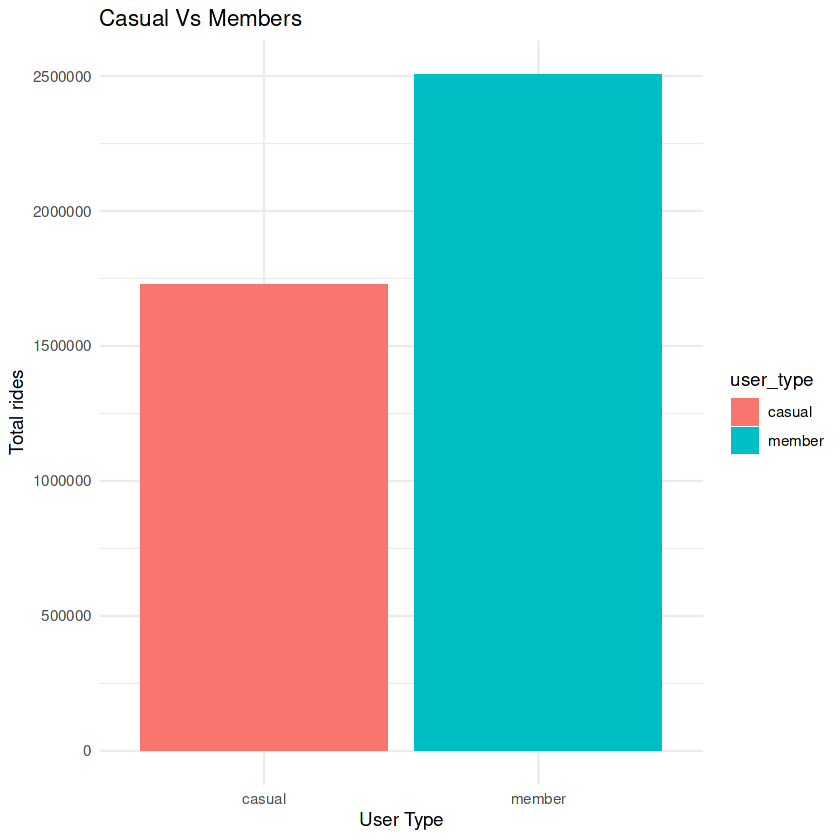

In [126]:
clean_data %>%
  group_by(user_type, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  arrange(desc(count)) %>%
  ggplot(aes(x = user_type, y = count, fill = user_type)) +
  geom_bar(stat = "identity") +
  labs(x = "User Type", y = "Total rides", title = "Casual Vs Members") +
  theme_minimal()

* From the above findings, over **~59%** of rides are members and **~41%** are casual riders for the year 2022.
* The members are **18%** more than the casual riders

### Total rides by Bike types

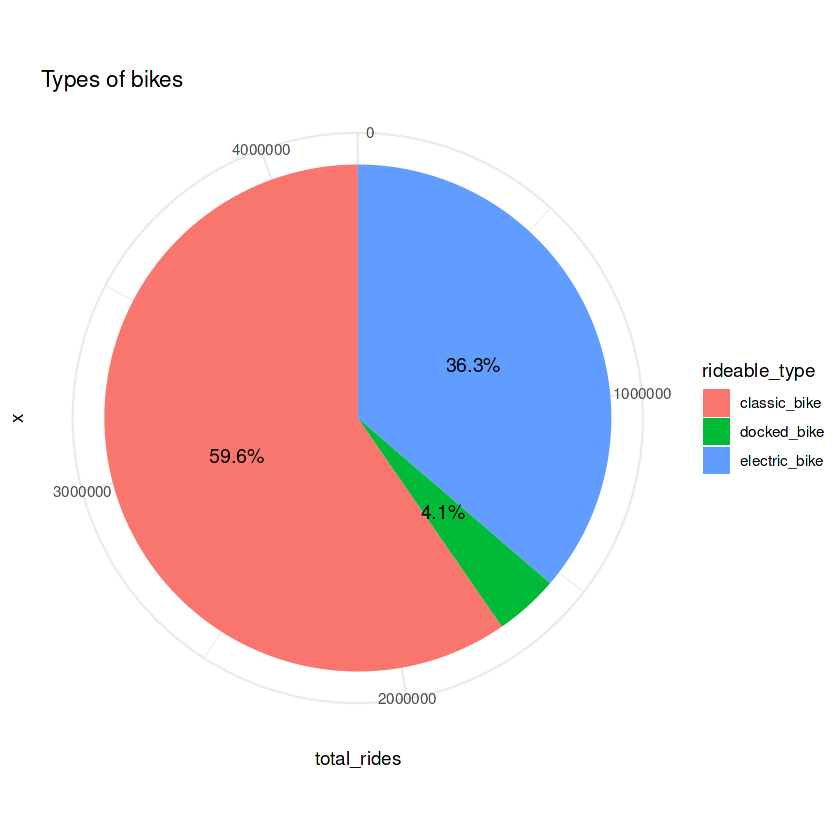

In [127]:
ride_types <- sqldf("SELECT rideable_type, COUNT(rideable_type) as total_rides
                     FROM clean_data
                     GROUP BY rideable_type
                     ORDER BY 2 DESC")
# Calculate the percentages and round them
ride_types$percentage <- round(ride_types$total_rides / sum(ride_types$total_rides) * 100, 1)

# Create the pie chart using ggplot2
ggplot(ride_types, aes(x = "",y =  total_rides, fill = rideable_type)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Types of bikes") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  geom_text(aes(label = paste0(percentage, "%")), position = position_stack(vjust = 0.5), size = 4) +
  theme_minimal() +
  theme(legend.position = "right")

* The classic bikes have the highest followed by electric bikes then docked bikes.
* Let's see the distribution by members vs casual riders.

In [128]:
# ggplot(ride_types, aes(x = reorder(rideable_type, -total_rides), y = total_rides, fill = rideable_type)) +
#   geom_col() +
#   labs(x = "Rideable Type", y = "Count", title = "Count of Rideable Types") +
#   scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
#   geom_text(aes(label = paste0(total_rides)), vjust = -0.5, size = 4) +
#   theme_minimal() +
#   theme(legend.position = "none")

In [129]:
# Calculating the counts by rideable_type and user_type
counts <- clean_data %>%
  count(rideable_type, user_type)

# Reorder rideable_type based on the count of user_type
counts <- counts %>%
  mutate(rideable_type = fct_reorder(rideable_type, n, .desc = TRUE))

# Convert counts data frame to tibble
as_tibble(counts)

rideable_type,user_type,n
<fct>,<chr>,<int>
classic_bike,casual,876108
classic_bike,member,1647902
docked_bike,casual,172899
electric_bike,casual,677443
electric_bike,member,859215


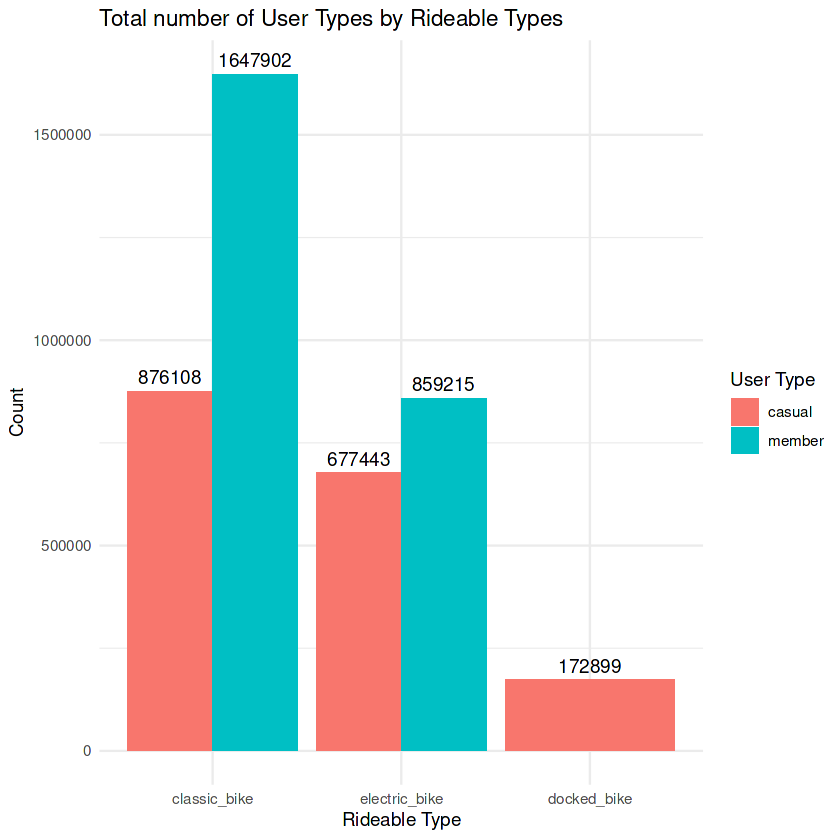

In [130]:
# Calculating the counts by rideable_type and user_type
counts <- clean_data %>%
  count(rideable_type, user_type)

# Reorder rideable_type based on the count of user_type
counts <- counts %>%
  mutate(rideable_type = fct_reorder(rideable_type, n, .desc = TRUE))

# Plot the data with counts as labels
ggplot(counts, aes(x = rideable_type, y = n, fill = user_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(
    aes(label = n),
    position = position_dodge(width = 0.9),
    vjust = -0.5
  ) +
  labs(x = "Rideable Type", y = "Count", title = "Total number of User Types by Rideable Types") +
  scale_fill_discrete(name = "User Type") +
  theme_minimal() +
  theme(legend.position = "right")

* classic bikes are predominantly used by members. 
* electric bikes are almost equal among casuals and members.
* docked bikes are only used by casual riders.
* The usage pattern of docked bikes only by casual riders can be more recognizable if we have additional data about the pricing details.

### Avg ride duration

In [131]:
# average ride duration of over all customers
clean_data %>%
    summarise(average_ride_length = round(mean(ride_length))) %>%
    mutate(average_ride_length = as.numeric(average_ride_length),
         average_ride_length = hms::hms(average_ride_length))

average_ride_length
<time>
00:17:10


In [132]:
# average ride duartion based on customer type
clean_data %>%
  group_by(user_type) %>%
  summarise(average_ride_length = round(mean(ride_length))) %>%
  mutate(average_ride_length = as.numeric(average_ride_length),
         average_ride_length = hms::hms(average_ride_length)) %>%
  pivot_wider(names_from = user_type, values_from = average_ride_length)

casual,member
<time>,<time>
00:23:53,00:12:33


* The average ride duaration of casual is double than that of the members.
* Let's see the average duration for each rideable type.

In [133]:
# average ride duartion based on rideable type
clean_data %>%
  group_by(rideable_type) %>%
  summarise(average_ride_length = round(mean(ride_length))) %>%
  mutate(average_ride_length = as.numeric(average_ride_length),
         average_ride_length = hms::hms(average_ride_length)) %>%
  pivot_wider(names_from = rideable_type, values_from = average_ride_length)

classic_bike,docked_bike,electric_bike
<time>,<time>,<time>
00:17:12,00:48:16,00:13:37


* Docked bikes have more average than the rest of the two rideable types.
* The customers with leisure (i.e., casual riders) have more average duration than members.
* Let's assume that most of the members are working professionals, students, etc. for their commute and most of the casual riders are tourists, leisure travellers etc.
* We need more data about customer's occupation.

In [134]:
clean_data %>%
    group_by(user_type) %>%
    summarise(mean_distance = mean(distance_km))

user_type,mean_distance
<chr>,<dbl>
casual,2.159223
member,2.060351


In [135]:
clean_data %>%
    group_by(rideable_type) %>%
    summarise(mean_distance = round(mean(distance_km),2))

rideable_type,mean_distance
<chr>,<dbl>
classic_bike,1.99
docked_bike,2.18
electric_bike,2.27


* The average distance for both user types and rideable type are almost same.
* Let's see the correlation for distance and ride_duration

In [136]:
# ggplot(clean_data, aes(x = ride_length, y = distance_km)) +
#   geom_point(color = "blue") +
#   xlab("Duration") +
#   ylab("Distance") +
# #   scale_y_log10() +
#   theme_minimal()


### Daily pattern of rides

In [137]:
# Let's also see the number of rides per day of week
sqldf("SELECT day_of_week,COUNT(day_of_week) AS total_count
       FROM clean_data 
       GROUP BY day_of_week
       ORDER BY 2 DESC")

day_of_week,total_count
<chr>,<int>
Saturday,687915
Thursday,619237
Wednesday,596940
Friday,589049
Sunday,586300
Tuesday,586260
Monday,567866


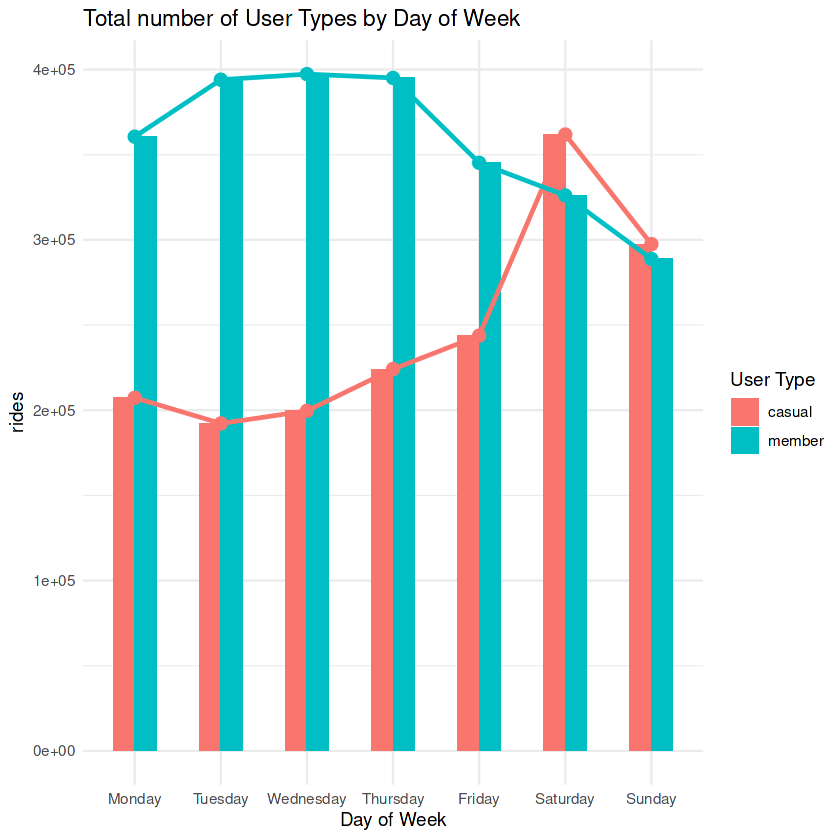

In [138]:
# Calculate the counts by day_of_week and user_type
counts <- clean_data %>%
  count(day_of_week, user_type)

# Reorder day_of_week based on the count of user_type
counts <- counts %>%
  mutate(day_of_week = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))

# Plot the data with counts as labels
ggplot(counts, aes(x = day_of_week, fill = user_type)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5), aes(y = n)) +
  geom_line(aes(y = n, group = user_type, color = user_type), size = 1) +
  geom_point(aes(y = n, color = user_type), size = 3) +  # Add dots
  labs(x = "Day of Week", y = "rides", title = "Total number of User Types by Day of Week") +
  scale_fill_discrete(name = "User Type") +
  scale_color_discrete(name = "User Type") +
  theme_minimal() +
  theme(legend.position = "right")


* In this column chart, members are almost consistent during the weekdays and slightly minimum(than casual riders) in weekends, whereas vice versa for casual riders. 
* The consistency in week days for members may be due to working hours and increase in weekends is due to holidays.

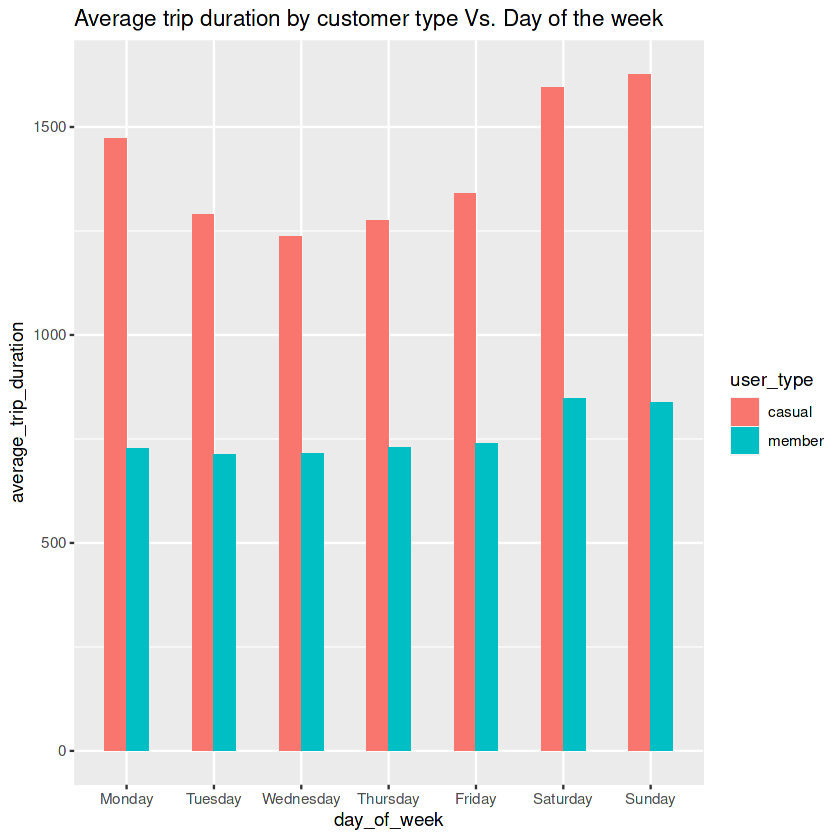

In [157]:
clean_data %>%
  group_by(user_type, day_of_week) %>%
  mutate(day_of_week = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))%>%
  summarise(average_trip_duration = mean(ride_length), .groups = "drop") %>%
  mutate(average_trip_duration = as.numeric(average_trip_duration)) %>%
  ggplot(aes(x = day_of_week, y = average_trip_duration, fill = user_type)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5)) +
  labs(title = "Average trip duration by customer type Vs. Day of the week")


* Weekends not only having more number of trips but also have longer trip duartion

### Monthly pattern of rides

In [139]:
sqldf("SELECT month, COUNT(month) AS total_count
       FROM clean_data 
       GROUP BY month
       ORDER BY 2 DESC")

month,total_count
<chr>,<int>
July,642611
June,620301
August,605269
September,535114
May,502502
October,414234
April,272536
November,255739
March,215940


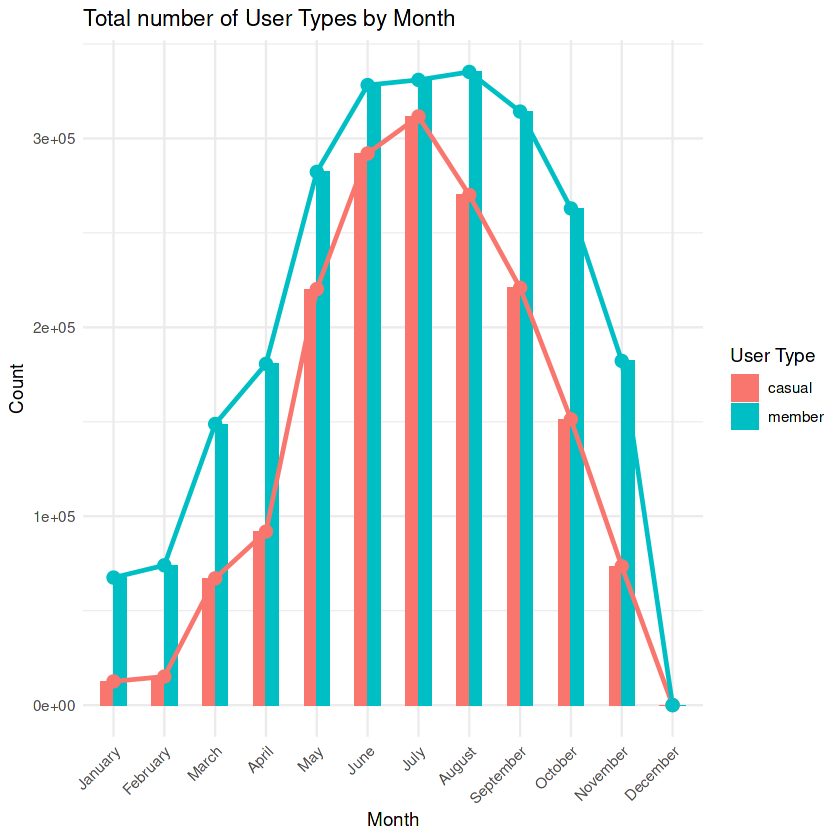

In [140]:
counts <- clean_data %>%
  count(month, user_type) %>%
  na.omit()  # Remove NA values

counts <- counts %>%
  mutate(month = factor(month, levels = c("January", "February", "March", "April", "May", "June",
                                          "July", "August", "September", "October", "November", "December")))

ggplot(counts, aes(x = month, fill = user_type)) +
  geom_col(width = 0.5, position = position_dodge(width = 0.5), aes(y = n)) +
  geom_line(aes(y = n, group = user_type, color = user_type), size = 1) +
  geom_point(aes(y = n, color = user_type), size = 3) +
  labs(x = "Month", y = "Count", title = "Total number of User Types by Month") +
  scale_fill_discrete(name = "User Type") +
  scale_color_discrete(name = "User Type") +
  theme_minimal() +
  theme(legend.position = "right", 
        axis.text.x = element_text(angle = 45, hjust = 1))


* By looking at this monthly column chart, **June, July and August** are the peak months for both members as well as casual riders. But during the **November, December(Very minimal), January and February** the rides are minimum.
* This pattern may be due to the seasonal changes,
    * spring and summer(Jun-Aug) - increased crowd, family- friendly activities, increased tourist visits
    * Winter (Nov-Feb) -  freezing climate which caused reduction in rides
* However, members took more rides than casual riders throughout the whole year.

### Hourly pattern of rides

In [141]:
sqldf("SELECT started_hour, COUNT(started_hour) AS total_count
       FROM clean_data 
       GROUP BY started_hour
       ORDER BY 2 DESC")

started_hour,total_count
<fct>,<int>
17,438192
16,372475
18,364249
15,297353
19,266733
14,255967
13,249738
12,247761
11,212561


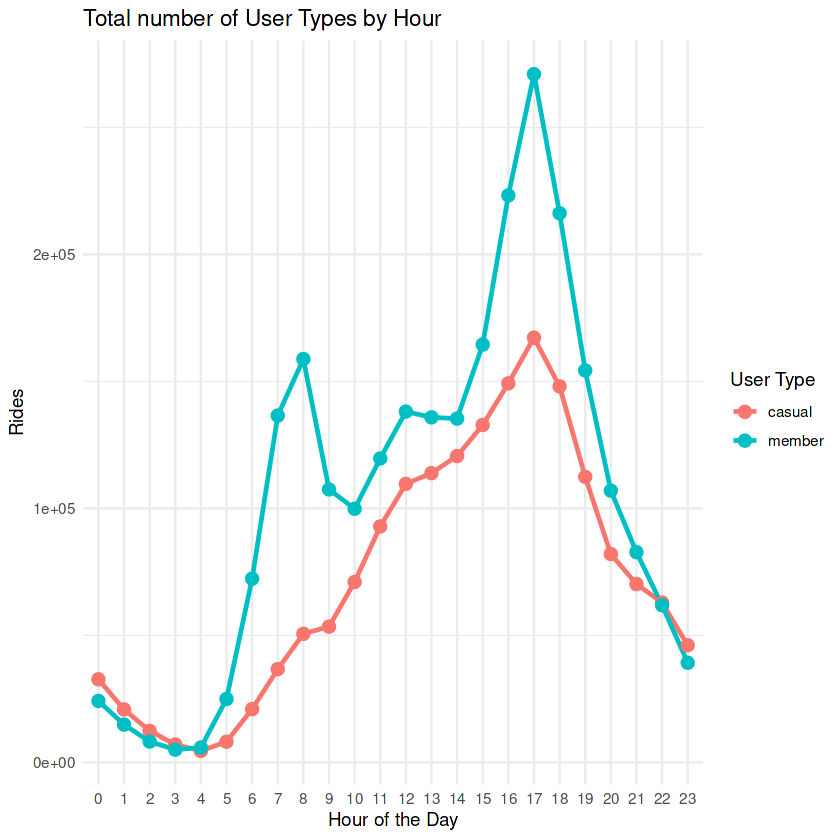

In [142]:
# Calculate the counts by hour of the day and user_type
hour_counts <- clean_data %>%
  count(started_hour, user_type)

# Plot the data as a line graph with dots
ggplot(hour_counts, aes(x = started_hour, y = n, color = user_type, group = user_type)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  labs(x = "Hour of the Day", y = "Rides", title = "Total number of User Types by Hour") +
  scale_color_discrete(name = "User Type") +
  theme_minimal() +
  theme(legend.position = "right")


* From this line graph, for members, the peak hours are **7-9 am** and **16-18 pm**.
* For casual riders, the rides are gradually increases and peaks at **16-18 pm**.
* We can hypothesize, most of the members are working professionals or students due to increased rides in morning and evening time periods, however we still need more data to conclude.

In [2]:
# # Create the histogram using ggplot2
# ggplot(clean_data, aes(x = distance_km)) +
#   geom_histogram(binwidth = 1, fill = "blue", color = "black") +
#   xlab("Values") +
#   ylab("Frequency") +
#   ggtitle("Histogram") +
#   scale_y_log10()


In [1]:
# ggplot(clean_data, aes(x = distance_km)) +
#   geom_histogram(binwidth = 1, fill = "blue", color = "black") +
#   geom_density(color = "red", size = 1, adjust = 10) +
#   xlab("Values") +
#   ylab("Density/Frequency") +
#   ggtitle("Histogram with Smoothed Kernel Density Curve") +
#   scale_y_log10()


# <p style="padding:10px;background-color:#65939B ;margin:0;color:yellow;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Act Phase</p>

|Recommendation| Reason |
|---| ---|
|1. Offering credit points, Coupons, Discounts for memberships| For attracting casual riders and benefits of subscribing annual membership by **conducting Marketing Campaigns at the docking stations** |
|2. Weekend only membership| Based on our result, total rides for casual riders are more than that of members. **We can exclusively introduce this new membership scheme for more conversions** |
|3. Limiting ride duration for casual riders | Since the casual riders have double the average duration than the members, providing limited time duration may have an impact in customer conversion|

We can also consider
* Building exclusive app for Cyclistic for notifications.
* Official website.
* Customer ratings, feedbacks and testimonials.
* Digital marketing like emails, social media platforms, advertisements etc.

### Additional data requirements
* Pricing details to know the cost plan for discounts.
* Customer's demographic data to know the parameters that encourage the customer conversion.


## Thank you for Reading :)